### Dataset: https://www.kaggle.com/olistbr/brazilian-ecommerce/home

## Libraries 

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.linear_model import LassoCV

## Data Prepration

In [135]:
order_dataset=pd.read_csv('orders_dataset.csv',parse_dates=['order_purchase_timestamp','order_approved_at',
                                                            'order_delivered_customer_date','order_estimated_delivery_date'])

In [136]:
order_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [137]:
order_dataset.shape

(99441, 8)

In [138]:
order_dataset['order_id'].nunique()

99441

In [139]:
order_items=pd.read_csv('order_items.csv',parse_dates=['shipping_limit_date'])

In [140]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [141]:
order_items.shape

(112650, 7)

In [142]:
order_items['order_id'].nunique()

98666

In [143]:
order_items['Key']=order_items['order_id'] + '_' +order_items['product_id']

In [144]:
order_items['Key'].nunique()

102425

In [145]:
order_items[order_items['Key'].duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Key
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,0008288aa423d2a3f00fcb17cd7d8719_368c6c730842d...
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,00143d0f86d6fbd9f9b38ab440ac16f5_e95ee6822b66a...
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,00143d0f86d6fbd9f9b38ab440ac16f5_e95ee6822b66a...
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,001ab0a7578dd66cd4b0a71f5b6e1e41_0b0172eb0fd18...
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,001ab0a7578dd66cd4b0a71f5b6e1e41_0b0172eb0fd18...
49,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78,001d8f0e34a38c37f7dba2a37d4eba8b_e67307ff0f15a...
76,002c9def9c9b951b1bec6d50753c9891,2,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,2018-05-21 17:32:03,78.00,8.90,002c9def9c9b951b1bec6d50753c9891_2d9ff06c8870a...
88,003324c70b19a16798817b2b3640e721,2,2b939dc9b176d7fa21594d588815d4a4,dbc22125167c298ef99da25668e1011f,2017-05-24 19:22:34,102.90,14.45,003324c70b19a16798817b2b3640e721_2b939dc9b176d...
102,003822434f91204da0a51fe4cf2aba18,2,99e71b776debf2f01a69dce207e3e4f8,c54679b132454625907c773d273d4126,2018-06-21 02:30:28,69.00,18.58,003822434f91204da0a51fe4cf2aba18_99e71b776debf...
112,003f201cdd39cdd59b6447cff2195456,2,656e0eca68dcecf6a31b8ececfabe3e8,0b90b6df587eb83608a64ea8b390cf07,2018-03-05 17:10:41,85.00,17.03,003f201cdd39cdd59b6447cff2195456_656e0eca68dce...


In [146]:
df1=order_items.groupby(['order_id','product_id','seller_id','shipping_limit_date']).agg({'order_item_id' : 'count', 'price' : 'sum', 'freight_value' : 'mean'}).reset_index()

In [147]:
df1.shape

(102425, 7)

In [148]:
df = pd.merge(df1, order_dataset, 
              left_on ='order_id', right_on = 'order_id', how='left')

In [149]:
df.shape

(102425, 14)

In [150]:
sellers_dataset=pd.read_csv('sellers_dataset.csv')

In [151]:
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [152]:
df=pd.merge(df, sellers_dataset, left_on='seller_id', right_on='seller_id', how='left')

In [153]:
customers=pd.read_csv('customers.csv')

In [154]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [155]:
df=pd.merge(df,customers,left_on='customer_id',right_on='customer_id',how='left')

In [156]:
products_dataset=pd.read_csv('products_dataset.csv')

In [157]:
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [158]:
df=pd.merge(df,products_dataset,left_on='product_id',right_on='product_id',how='left')

In [159]:
english=pd.read_csv('product_category_name_translation.csv')

In [160]:
english.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [161]:
df=pd.merge(df,english,left_on='product_category_name',right_on='product_category_name',how='left')

In [162]:
review_score=pd.read_excel('Review.xlsx')

In [163]:
review_score.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18-01-2018 00:00,18-01-2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-10-03 00:00:00,2018-11-03 03:05:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17-02-2018 00:00,18-02-2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Received well before the stipulated deadline.,21-04-2017 00:00,21-04-2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Congratulations to all happy Easter,2018-01-03 00:00:00,2018-02-03 10:26:00


In [164]:
df=pd.merge(df,review_score,left_on='order_id',right_on='order_id',how='left')

In [165]:
df.head()

,order_id,product_id,seller_id,shipping_limit_date,order_item_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,1,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,28.0,9.0,14.0,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfect, product delivered before the combined.",21-09-2017 00:00,22-09-2017 10:57
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,1,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,50.0,30.0,40.0,pet_shop,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,13-05-2017 00:00,15-05-2017 11:34
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,1,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,33.0,13.0,33.0,furniture_decor,0c5b33dea94867d1ac402749e5438e8b,5,NaN,It arrived before the deadline and the product...,23-01-2018 00:00,23-01-2018 16:06
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,1,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,16.0,10.0,15.0,perfumery,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,15-08-2018 00:00,15-08-2018 16:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,1,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,35.0,40.0,30.0,garden_tools,940144190dcba6351888cafa43f3a3a5,5,NaN,I liked it because it came in the given time.,2017-02-03 00:00:00,2017-03-03 10:54:00


In [166]:
geo=pd.read_csv('olist_geolocation_dataset.csv')

In [167]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [168]:
seller_coordinates = geo.groupby('geolocation_state').agg({'geolocation_lat' : 'mean','geolocation_lng' : 'mean'}).reset_index()

In [169]:
Customer_coordinates = geo.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat' : 'mean','geolocation_lng' : 'mean'}).reset_index()

In [170]:
df=pd.merge(df,seller_coordinates, left_on ='customer_state',right_on = 'geolocation_state', how = 'left' )

In [171]:
df=pd.merge(df,Customer_coordinates, left_on ='customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix', how = 'left' )

In [172]:
df['date'] = df['order_purchase_timestamp'].dt.date

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103035 entries, 0 to 103034
Data columns (total 43 columns):
order_id                         103035 non-null object
product_id                       103035 non-null object
seller_id                        103035 non-null object
shipping_limit_date              103035 non-null datetime64[ns]
order_item_id                    103035 non-null int64
price                            103035 non-null float64
freight_value                    103035 non-null float64
customer_id                      103035 non-null object
order_status                     103035 non-null object
order_purchase_timestamp         103035 non-null datetime64[ns]
order_approved_at                103021 non-null datetime64[ns]
order_delivered_carrier_date     101998 non-null object
order_delivered_customer_date    100784 non-null datetime64[ns]
order_estimated_delivery_date    103035 non-null datetime64[ns]
seller_zip_code_prefix           103035 non-null int64
seller_ci

## EDA

In [174]:
df=df[(df['shipping_limit_date']>'2017-01-01') & (df['shipping_limit_date']<'2018-06-01') ]

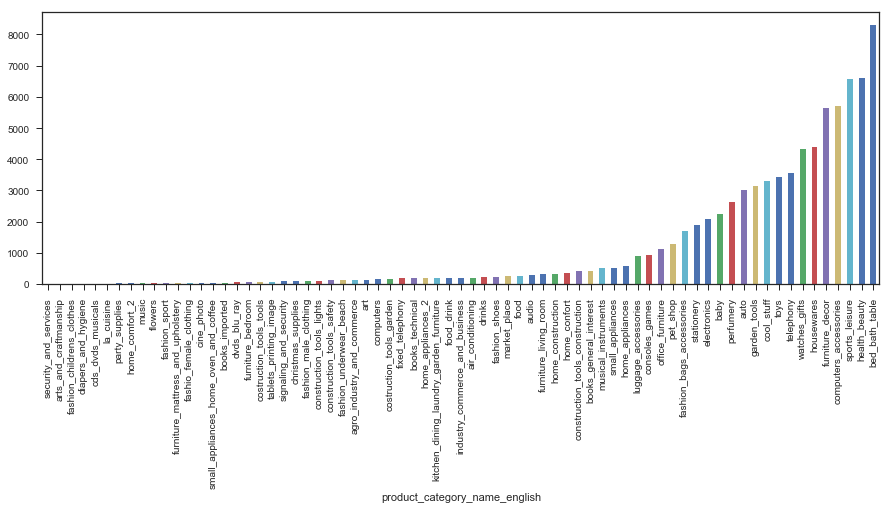

In [175]:
fig = plt.figure(figsize=[15,5])
df.groupby('product_category_name_english').order_id.count().sort_values().plot(kind='bar')

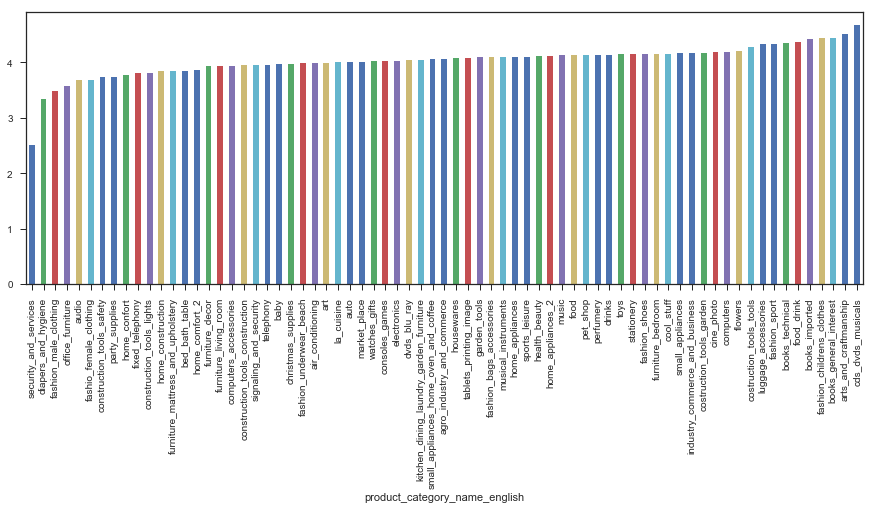

In [176]:
fig = plt.figure(figsize=[15,5])
df.groupby('product_category_name_english').review_score.mean().sort_values().plot(kind='bar')

In [177]:
df['price'].describe()

count    82081.000000
mean       131.955914
std        201.379085
min          0.850000
25%         44.900000
50%         81.200000
75%        147.700000
max      13440.000000
Name: price, dtype: float64

In [178]:
df[df['price']>13000]

,order_id,product_id,seller_id,shipping_limit_date,order_item_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_state,geolocation_lat_x,geolocation_lng_x,geolocation_zip_code_prefix,geolocation_lat_y,geolocation_lng_y,date
1512,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,8,13440.0,28.01,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,...,Please check the delivery of the order as we d...,18-10-2017 00:00,19-10-2017 13:10,RJ,-22.743477,-43.15554,20080.0,-22.901209,-43.184957,2017-09-29


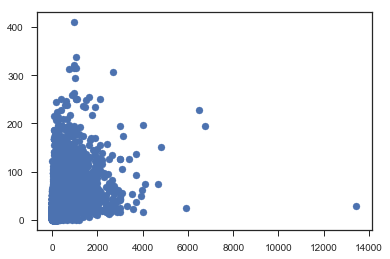

In [179]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['price'],df['freight_value'])
plt.show()

In [180]:
df['Sales']=df['price']+df['freight_value']

In [181]:
df['freigt_ratio'] = df['price']  / df['freight_value'] 

In [182]:
def getDistance(lat_a, lng_a, lat_b, lng_b):
    Earth_Radius = 6373.0
    
    lat1 = np.radians(lat_a)
    lon1 = np.radians(lng_a)
    lat2 = np.radians(lat_b)
    lon2 = np.radians(lng_b)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.tanh(np.sqrt(a)/np.sqrt(1 - a))
    distance = Earth_Radius * c
    return distance

In [183]:
df['Distance']= getDistance(df['geolocation_lat_x'],df['geolocation_lng_x'],df['geolocation_lat_y'],df['geolocation_lat_y'])

In [184]:
df['MonYear']=df['shipping_limit_date'].dt.to_period('M')

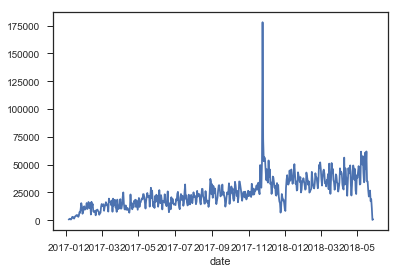

In [185]:
df.groupby('date').Sales.sum().plot(kind='line')

In [186]:
df['DeliveryDays']=(df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

In [187]:
df['EstimatedDays']=(df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days 

In [188]:
df['IsLate']= np.where(df['DeliveryDays'] > df['EstimatedDays'], 1, 0)

In [189]:
df['Variance'] = df['EstimatedDays'] - df['DeliveryDays']

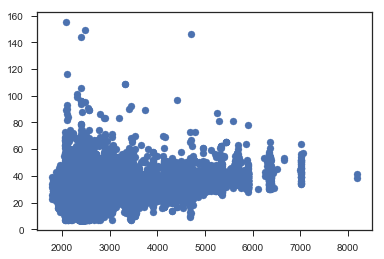

In [190]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x=df['Distance'] , y= df['EstimatedDays'])

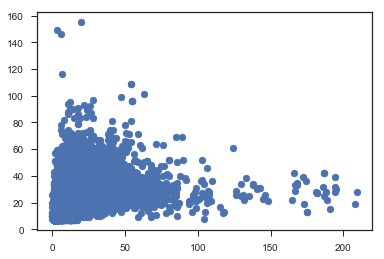

In [191]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['DeliveryDays'],df['EstimatedDays'])

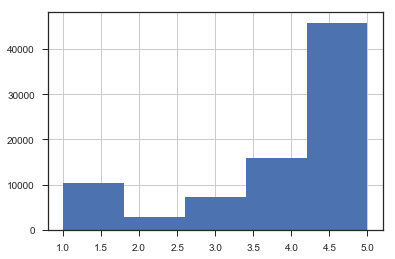

In [192]:
df['review_score'].hist(bins=5)

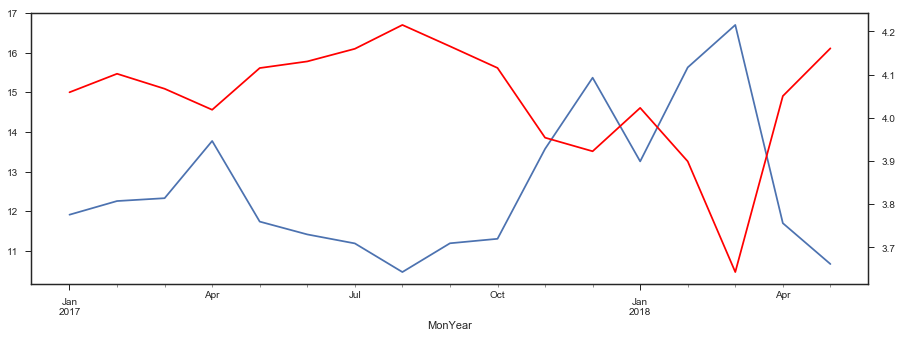

In [194]:
fig = plt.figure(figsize=[15,5]) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx()
df.groupby('MonYear').DeliveryDays.mean().plot(kind='line', ax=ax)
df.groupby('MonYear').review_score.mean().plot(kind='line', color='red', ax=ax2)

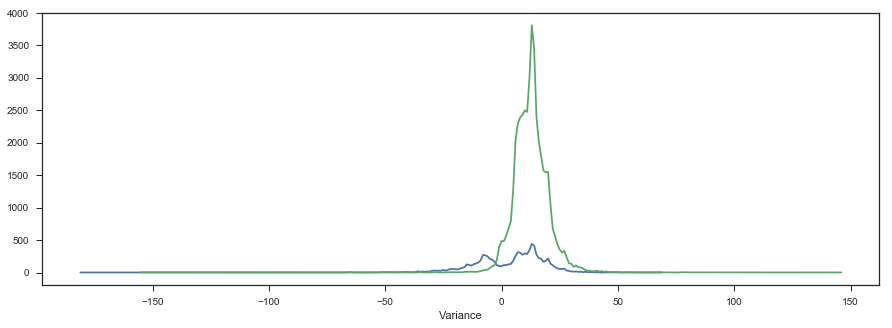

In [195]:
fig = plt.figure(figsize=[15,5]) 
ax = fig.add_subplot(111) 
var = df[(df['review_score']==1)].groupby('Variance').order_id.count().plot(kind='line') 
var1 = df[(df['review_score']==5)].groupby('Variance').order_id.count().plot(kind='line') 

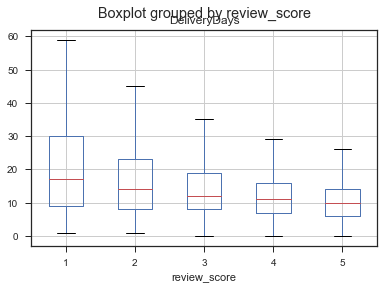

In [196]:
df[df.DeliveryDays < 60].boxplot( column="DeliveryDays" , by="review_score")

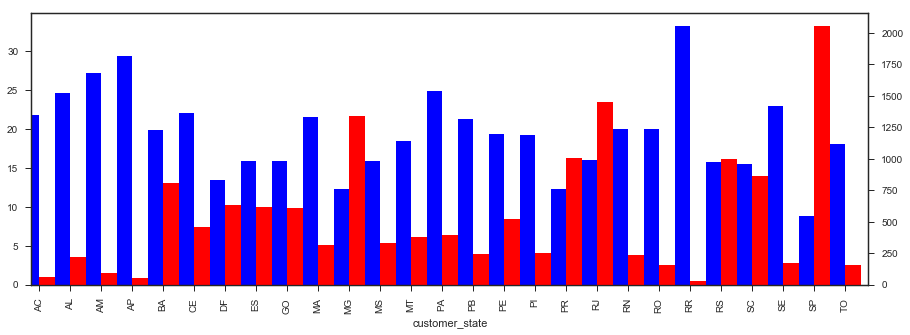

In [197]:
fig = plt.figure(figsize=[15,5]) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx()
df.groupby('customer_state').DeliveryDays.mean().plot(kind='bar', color = 'blue', ax=ax, position = 1)
df.groupby('customer_state').seller_id.nunique().plot(kind='bar', color = 'red', ax=ax2, position = 0)

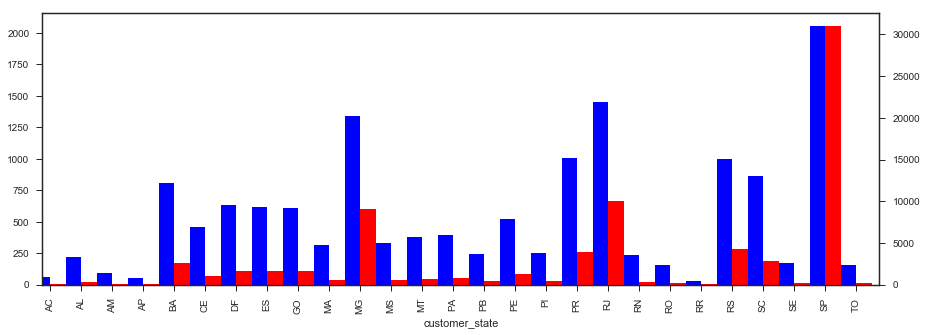

In [198]:
fig = plt.figure(figsize=[15,5]) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx()
df.groupby('customer_state').seller_id.nunique().plot(kind='bar', color = 'blue', ax=ax, position = 1)
df.groupby('customer_state').customer_unique_id.nunique().plot(kind='bar', color='red', ax=ax2, position = 0)

In [199]:
df['WeekOfDay']=df['shipping_limit_date'].dt.dayofweek
df['hour']=df['shipping_limit_date'].dt.hour

In [200]:
dfHP=df.groupby(['WeekOfDay','hour']).order_id.nunique().unstack().reset_index()

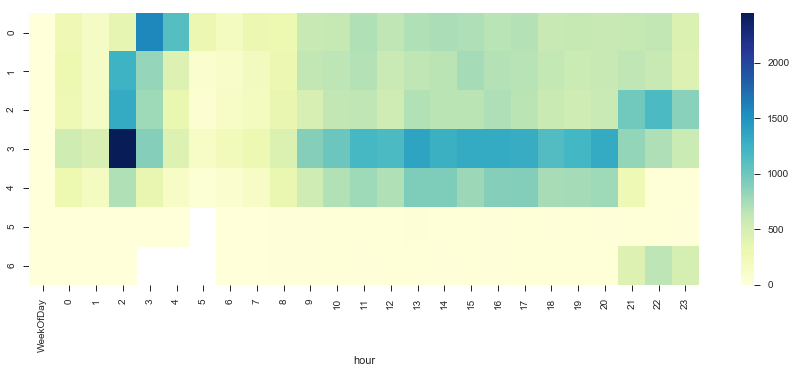

In [201]:
fig = plt.figure(figsize=[15,5])
sns.heatmap(dfHP,cmap="YlGnBu")

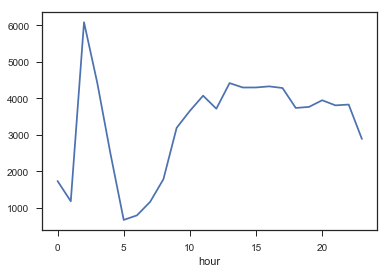

In [202]:
df.groupby('hour').order_id.nunique().plot(kind='line')

## RFM Dataset For Customer Segmentation

In [203]:
RFM=df.groupby('customer_unique_id').agg({'Sales' : 'sum', 
                                          'order_item_id' : 'sum' , 
                                          'order_purchase_timestamp' : 'max',
                                          'EstimatedDays' : 'mean' }).reset_index()

In [204]:
RFM['rec'] = (max(RFM['order_purchase_timestamp'])-RFM['order_purchase_timestamp']).dt.days

In [205]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76009 entries, 0 to 76008
Data columns (total 6 columns):
customer_unique_id          76009 non-null object
Sales                       76009 non-null float64
order_item_id               76009 non-null int64
order_purchase_timestamp    76009 non-null datetime64[ns]
EstimatedDays               76009 non-null float64
rec                         76009 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 3.5+ MB


In [206]:
Features=['Sales','rec', 'EstimatedDays']

In [207]:
dfRFM=RFM[Features]

In [208]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(dfRFM)

In [209]:
dfScaled = pd.DataFrame(scaled_df)

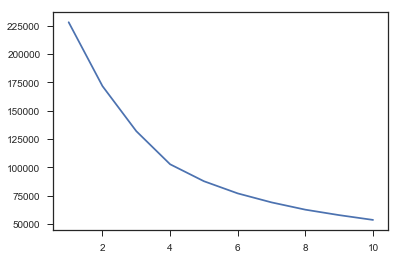

In [210]:
score = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(dfScaled)
    score.append(kmeans.inertia_)  
    
plt.plot(range(1, 11), score)
plt.show()

In [211]:
kmeans  = KMeans(n_clusters = 4, random_state= 123)
kmeans.fit(dfScaled)
dfScaled['Predict']=kmeans.predict(dfScaled)

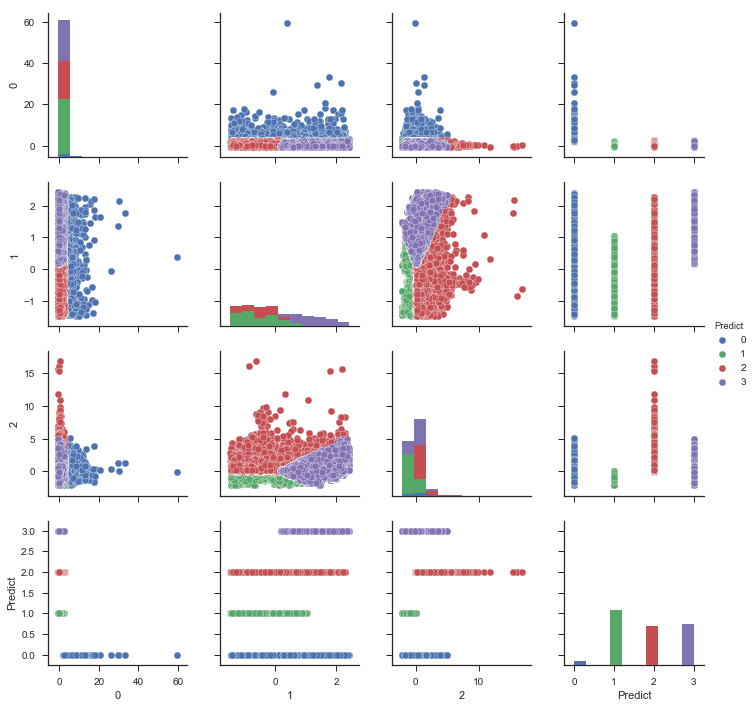

In [212]:
sns.set(style="ticks")
sns.pairplot(dfScaled, hue= 'Predict')